## Introduction

We'll learn a couple of different techniques for combining data using pandas to easily handle situations like pulling data from mulitiple sources.

__Goal:__ analyze the 2015, 2016, and 2017 World Happiness Reports. Specifically, we'll look to answer the following question:
```
Did world happiness increase, decrease, or stay about the same from 2015 to 2017?
```
As a reminder, these reports assign each country a happiness score based on a poll question that asks respondents to rank their life on a scale of 0 - 10, so "world happiness" refers to this definition specifically.

Descriptions for some of the columns:
- `Country` - Name of the country
- `Region` - Name of the region the country belongs to
- `Happiness Rank` - The rank of the country, as determined by its happiness score
- `Happiness Score` - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10

In [1]:
import pandas as pd
import numpy as np

In [2]:
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')
happiness2015['Year'] = 2015
happiness2016 = pd.read_csv('data/World_Happiness_2016.csv')
happiness2016['Year'] = 2016
happiness2017 = pd.read_csv('data/World_Happiness_2017.csv')
happiness2017['Year'] = 2017

### Combining Dataframes with the Concat Function

The `concat()` function combines dataframes one of two ways:
1. Stacked: Axis = 0 (This is the default option.)
<img src='_images/Concat_Updated.svg' />
2. Side by Side: Axis = 1
<img src='_images/Concat_Axis1.svg' />

Since `concat` is a function, not a method, we use the syntax below:

<img src='_images/Concat_syntax.svg' />

In [3]:
head_2015 = happiness2015[['Country', 'Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country', 'Happiness Score', 'Year']].head(3)
concat_axis0 = pd.concat([head_2015, head_2016], axis=0)
concat_axis1 = pd.concat([head_2015, head_2016], axis=1)
#question1 = concat_axis0.shape[0]
question1 = 6
#question2 = concat_axis1.shape[0]
question2 = 3

We merely pushed the dataframes together vertically or horizontally - none of the values, column names, or indexes changed.

The `concat()` function combines dataframes with the same shape and index, as if "gluing" dataframes together.

However, what happens if the dataframes have different shapes or columns?

In [4]:
head_2015 = happiness2015[['Year', 'Country', 'Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country', 'Happiness Score', 'Year']].head(3)
concat_axis0 = pd.concat([head_2015, head_2016], axis=0, sort=False)
rows = 7
columns = 4

The analogy of "gluing" dataframes together doesn't fully describe what happens when concatenating dataframes of different shapes. Instead, the function combined the data according to the corresponding column names.

Note that because the `Standard Error` column didn't exist in `head_2016`, `NaN` values were created to signify those values are missing.

Also, notice again the indexes of the original dataframes didn't change. If the indexes aren't meaningful, it can be better to reset them.

### Combining Dataframes with Different Shapes Using the Concat Function

By default, the `concat` function will keep ALL of the data, no matter if missing values are created.

The `concat` function has a parameter, `ignore_index`, that can be used to clear the existing index and reset it in the result.

In [5]:
concat_update_index = pd.concat([head_2015,head_2016], axis=0, ignore_index=True, sort=False)

### Joining Dataframes with the Merge Function

We'll explore the `pd.merge()` function - a function that can execute high performance database-style joins.
__Note:__ Unlike the `concat` function, the `merge` function only combines dataframes horizontally (axis=1) and can only combine __two dataframes at a time__.

With the `merge()` function, we'll combine dataframes on a __key__, a shared index or column. When choosing a key, it's good practice to use keys with unique values to avoid duplicating data.

You can think of keys as creating a link from one dataframe to another using the common values or indexes.

<img src='_images/Merge_link.svg' />

We'll use the following syntax:

<img src='_images/Merge_syntax.svg' />

In [6]:
three_2015 = happiness2015[['Country', 'Happiness Rank', 'Year']].iloc[2:5]
three_2016 = happiness2016[['Country', 'Happiness Rank', 'Year']].iloc[2:5]
merged = pd.merge(left=three_2015, right=three_2016, on='Country')

In [7]:
merged

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


The one country returned in `merged` was "Norway", the only element that appeared in the `Country` column in BOTH `three_2015` and `three_2016`. This way of combining, or _joining_, data is called an _inner_ join. An inner join returns only the intersection of the keys, or the elements that appear in both dataframes with a common key.

### Joining on Columns with the Merge Function

The term "join" originates from SQL (or structured query language), a language used to work with databases. There are actually four different types of joins:
1. __Inner__: only includes elements that appear in both dataframes with a common key
2. __Outer__: includes all data from both dataframes
3. __Left__: includes all of the rows from the "left" dataframe along with any rows from the "right" dataframe with a common key; the result retains all columns from both of the original dataframes
4. __Right__: includes all of the rows from the "right" dataframe along with any rows from the "left" dataframe with a common key; the result retains all columns from both of the original dataframes.

In [8]:
merged_left = pd.merge(left=three_2015, right=three_2016, on='Country', how='left')
merged_left_updated = pd.merge(left=three_2016, right=three_2015, on='Country', how='left')

In [9]:
merged_left

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


In [10]:
merged_left_updated

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


- Changing the join type from an inner join to a left join resulted in a dataframe with more rows and created `NaN`s.
- When using a left join, interchanging the dataframes assigned to the `left` and `right` parameters changes the results.

Since the `Country` column was used as the key, only countries that appear in BOTH dataframes have a value in every column. "Norway" was the only value in the `Country` column in BOTH dataframes, so it's the only row with a value in every column.

When we interchanged the "left" and the "right" dataframes, the values changed.

In summary, we'd use a __left join__ when we don't want to drop any data from the left dataframe.

### Left Joins with the Merge Function

The `merge` function added a suffix of either `_x` or `_y` to columns of the same name to distinguish between them.

In [11]:
merged_suffixes = pd.merge(left=three_2015, right=three_2016, on='Country', how='left', suffixes=('_2015', '_2016'))
merged_updated_suffixes = pd.merge(left=three_2016, right=three_2015, on='Country', how='left', suffixes=('_2016', '_2015'))

###  Join on Index with the Merge Function

Let's look at another way to join dataframes - on the index.

<img src='_images/Index.svg' />

We'll join `happiness2015` and `happiness2016` on index using an _inner_ join, so that the result contains only the elements in the key that appear in BOTH dataframes.

To join on the index, we'll set the left_index and right_index parameters to True:
```
pd.merge(left=four_2015, right=three_2016, left_index=True, right_index=True, suffixes=('_2015','_2016'))
```

In [12]:
four_2015 = happiness2015[['Country', 'Happiness Rank', 'Year']].iloc[2:6]
# three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]    # Since it has already been created before; for refernce only
merge_index = pd.merge(left=four_2015, right=three_2016, left_index=True, right_index=True, suffixes=('_2015', '_2016'))
merge_index

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3,2016
3,Norway,4,2015,Norway,4,2016
4,Canada,5,2015,Finland,5,2016


When we join on index, however, our result will contain only common indexes.

<img src='_images/Join_index.svg' />

Let's explore what happens when we join on index with a left join instead.

In [13]:
merge_index_left = pd.merge(left=four_2015, right=three_2016, how='left', left_index=True, right_index=True, suffixes=('_2015', '_2016'))
merge_index_left

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3.0,2016.0
3,Norway,4,2015,Norway,4.0,2016.0
4,Canada,5,2015,Finland,5.0,2016.0
5,Finland,6,2015,NaN,NaN,NaN


### Summary:

|  | __pd.concat()__ | __pd.merge()__ |
|-|-|-|
| Default Join Type | Outer | Inner |
| Can Combine More Than Two Dataframes at a Time? | Yes | No |
| Can Combine Dataframes Vertically (axis=0) or Horizontally (axis=1)? | Both | Horizontally |
| Syntax | __Concat (Vertically)__ <br /><br /> `concat([df1,df2,df3])` <br /><br /> __Concat (Horizontally)__ <br /><br /> `concat([df1,df2,df3], axis = 1)` | __Merge (Join on Columns)__ <br /><br /> `merge(left = df1, right = df2, how = 'join_type', on = 'Col')` <br /><br /> __Merge (Join on Index)__ <br /><br /> `merge(left = df1, right = df2, how = 'join_type', left_index = True, right_index = True)` |

### Challenge: Combine Data and Create a Visualization

__Did world happiness increase, decrease, or stay about the same from 2015 to 2017?__

To answer this question, we'll create a bar plot in which each bar represented the mean happiness score for one of the years.

In [14]:
# Use a pivot table to aggregate the data according to Region.
means = happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=np.mean)

In [15]:
means

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


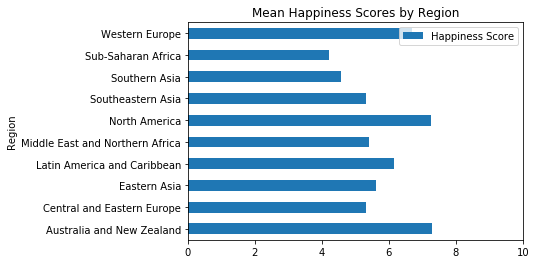

In [16]:
# Use the `df.plot()` method to plot the results
means.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0, 10))

Let's repeat the same steps, but this time, we'll group the data by the `Year` column. First, let's rename the `Happiness.Score` column so it matches the column name in `happiness2015` and `happiness2016`:
```
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)
```
Next, we need to combine `happiness2015`, `happiness2016`, and `happiness2017`, so that we can group the result by the `Year` column.

In [17]:
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

#### Tasks:

- Use either the `pd.concat()` function or the `pd.merge()` function to combine `happiness2015`, `happiness2016`, and `happiness2017`. Assign the result to `combined`.
    - Think about whether you need to combine the data horizontally or vertically in order to create a dataframe that can be grouped by year, and decide which function (`pd.concat()` or `pd.merge()`) you can use to combine the data.

- Use the `df.pivot_table()` method to create a pivot table from the `combined` dataframe. Set `Year` as the index and `Happiness Score` as the values. Assign the result to `pivot_table_combined`.

- Use the `df.plot()` method to create a bar chart of the results. Set the `kind` parameter to `barh`, the title to `'Mean Happiness Scores by Year'`, and the `xlim` parameter to `(0,10)`.

- Try to answer the following question based on the results of this exercise: Did world happiness increase, decrease, or stay about the same from 2015 to 2017?

In [19]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], axis=0, ignore_index=True, sort=False)

In [20]:
pivot_table_combined = combined.pivot_table(values='Happiness Score', index='Year', aggfunc=np.mean)

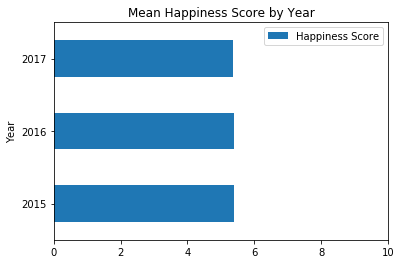

In [21]:
pivot_table_combined.plot(kind='barh', title='Mean Happiness Score by Year', xlim=(0, 10))

__Answer:__ The world happiness stayed about the same from 2015 to 2017

In this mission, we learned how to combine data using the `pd.concat()` and `pd.merge()` functions. In your travels with pandas, you may happen upon the `df.append()` and `df.join()` methods, which are basically shortcuts for the `concat()` and `merge()` functions.

In order to perform more complex analysis, we have to be able to clean and manipulate data, whether it be adding data to a dataframe or renaming a column. In the next mission, we'll continue building on what we've learned so far as we learn ways to transform and reshape our data.